# DSAI 2201 Winter 2024 Assignment

In [1]:
NAME = ""

COLLABORATORS = ""
# a maximum of 10% of the project can be done through collaboration, and need to be highlighted, also if the resulting 
# work of the collaboration cannot be defended in the interview, up to 75% of the grade can be deducted

## Assignment 1 - Data Analysis
**(20 points in total)**

In Assignments part 1 & part 2 we will go through the entire journey of a small data science project.

We will utilize one file for this assignment can be downloaded from Kaggle website that you will find attached in the dropbox and you will also find their respective in details in the following links: https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling

### Note: please use the dataset attached in the dropbox as it was modified for the sake of the assignment



### Question 1. (2 points)

**A) Analyze the distribution of churn events among the customers based on their geography and gender. Calculate their respective numbers and percentages. (1 point)**

**B) Compute descriptive statistics of the data. Comment on the results. (1 point)**

**C) Analyze the skew of numerical variables distributions (Numbers & Graphs). Comment on the results. (2 points)**

### Question 2. (2 points)

**Use univariate plots to analyze patterns in each of the numerical variables with respect to the churn status. Which categories of customers (geography and gender) were most likely to churn?, comment on the remaining attributes and the proportion of churned customers (2 points)**

### Question 3. (2 points)

**Use multivariate plots (correlation matrix plot and scatter plot) to:**

**A) Analyze the relationship between numerical variables. Comment on the results.**

**B) Identify potential factors that can predict churn events. Comment on the results.**

### Question 4. (3 points)

**Identify and remove any outliers in the numerical variables. Explain the rationale for identifying and removing outliers. (3 points)**

### Question 5. (3 points)

**How did you treat missing values for those attributes that you included in the analysis? Provide a detailed explanation in the comments.**

### Question 6. (3 points)

**The dataset contains a lot of zeros. Identify which numerical attributes cannot be 0 in a financial context and impute them, while explaining the rationale behind it.**

### Question 7. (2 points)

**Identify the numerical attributes that will need rescaling (with explanation), apply one of the rescaling techniques we have seen in our course, and explain your rationale.**

### Question 8. (3 points)

**Through extensive research, provide additional attributes that you can create that will enhance your dataset. Explain the logic behind it and add them to your data. (1.5 points)**

**Identify the most irrelevant attribute(s) and exclude them from your project for the next steps. (1.5 points)**


## Q1:

Solution:



In [1]:
import numpy as np  # library used for working with arrays
import pandas as pd  # library used for data manipulation and analysis
import seaborn as sns  # library for visualization
import matplotlib.pyplot as plt  # library for visualization
from sklearn.preprocessing import MinMaxScaler # library used for scaling the feature to a range.

# Load the customer churn dataset
churn_data_path = 'Churn_Modelling.csv'  
churn_df = pd.read_csv(churn_data_path)
churn_df.head()  # Display the first few rows of the dataset


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602.0,Hargrave,619,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1
1,2,15647311.0,Hill,608,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0
2,3,15619304.0,Onio,502,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1
3,4,15701354.0,Boni,699,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0
4,5,15737888.0,Mitchell,850,Spain,Female,43.0,2,125510.82,1.0,1,1,79084.10,0


In [3]:
grouped = churn_df.groupby(['Geography', 'Gender']).agg(
    Total_Customers=('CustomerId', 'count'),
    Churn_Events=('Exited', 'sum')
).reset_index()

# Calculate the churn percentage
grouped['Churn_Percentage'] = (grouped['Churn_Events'] / grouped['Total_Customers']) * 100

# Display the results
grouped

,Geography,Gender,Total_Customers,Churn_Events,Churn_Percentage
0,France,Female,2258,459,20.327724
1,France,Male,2748,350,12.736536
2,Germany,Female,1188,446,37.542088
3,Germany,Male,1313,365,27.798934
4,Spain,Female,1086,231,21.270718
5,Spain,Male,1387,182,13.121846


In [5]:
descriptive_stats = churn_df.describe(include='all')

# Display the descriptive statistics
descriptive_stats

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,9.993000e+03,10000,10000.000000,9994,9993,9995.000000,10000.000000,10000.000000,9992.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5013,5455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569093e+07,NaN,650.528800,NaN,NaN,38.920560,5.012800,76485.889288,1.530424,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193991e+04,NaN,96.653299,NaN,NaN,10.489257,2.892174,62397.405202,0.581704,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562852e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569073e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575322e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### Comments on the result:
**Geographic and Gender Distribution: The majority of customers are from France, and there are slightly more male customers than female customers. This distribution can help tailor specific marketing and retention strategies.**

**Credit Score and Age: The wide range in credit scores and age suggests a diverse customer base. Younger customers might be more likely to have lower credit scores, which could be a focus area for customer support and financial education.**

**Balance and Products: A significant number of customers have zero balance, which might indicate either inactive accounts or accounts primarily used for transactional purposes. Encouraging such customers to engage more with the bank’s products could be beneficial.**

**Churn Rate: With over 20% of customers having churned, it is crucial to understand the factors leading to churn and implement strategies to retain customers, especially focusing on high-risk groups identified through further analysis.**


C:\Users\ezzat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ezzat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ezzat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ezzat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

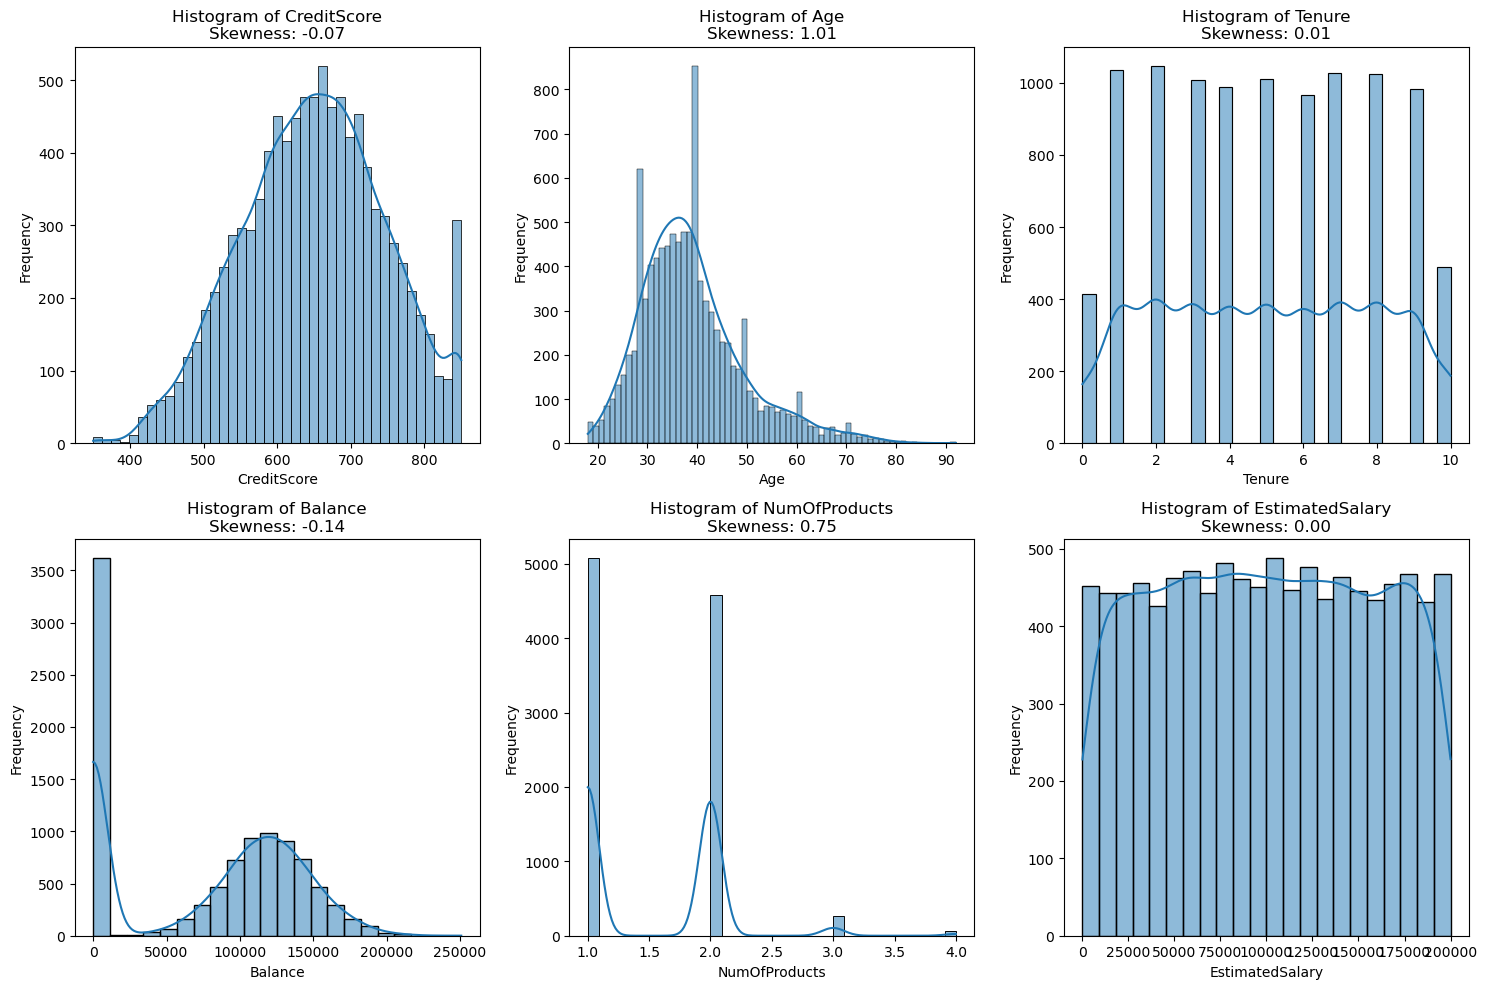

Skewness values for numerical columns:


CreditScore       -0.071607
Age                1.011594
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745166
EstimatedSalary    0.002085
dtype: float64

In [10]:
# List of numerical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Compute skewness for numerical columns
skewness = churn_df[numerical_columns].skew()

plt.figure(figsize=(15, 10))
for i in range(len(numerical_columns)):
    column = numerical_columns[i]
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid
    sns.histplot(churn_df[column], kde=True)  # Histogram with KDE
    plt.title(f'Histogram of {column}\nSkewness: {skewness[column]:.2f}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
# Display the skewness values
print("Skewness values for numerical columns:")
skewness

### Comments on Results
**CreditScore: Examine if the distribution is symmetric or skewed.**

**Age: Younger or older customers might be more frequent.**

**Tenure: Reflects how long customers have been with the bank.**

**Balance: Check for many zero balances.**

**NumOfProducts: Most customers might have a small number of products.**

**EstimatedSalary: Salaries could be normally distributed or skewed.**

###  Q2:
Solution:

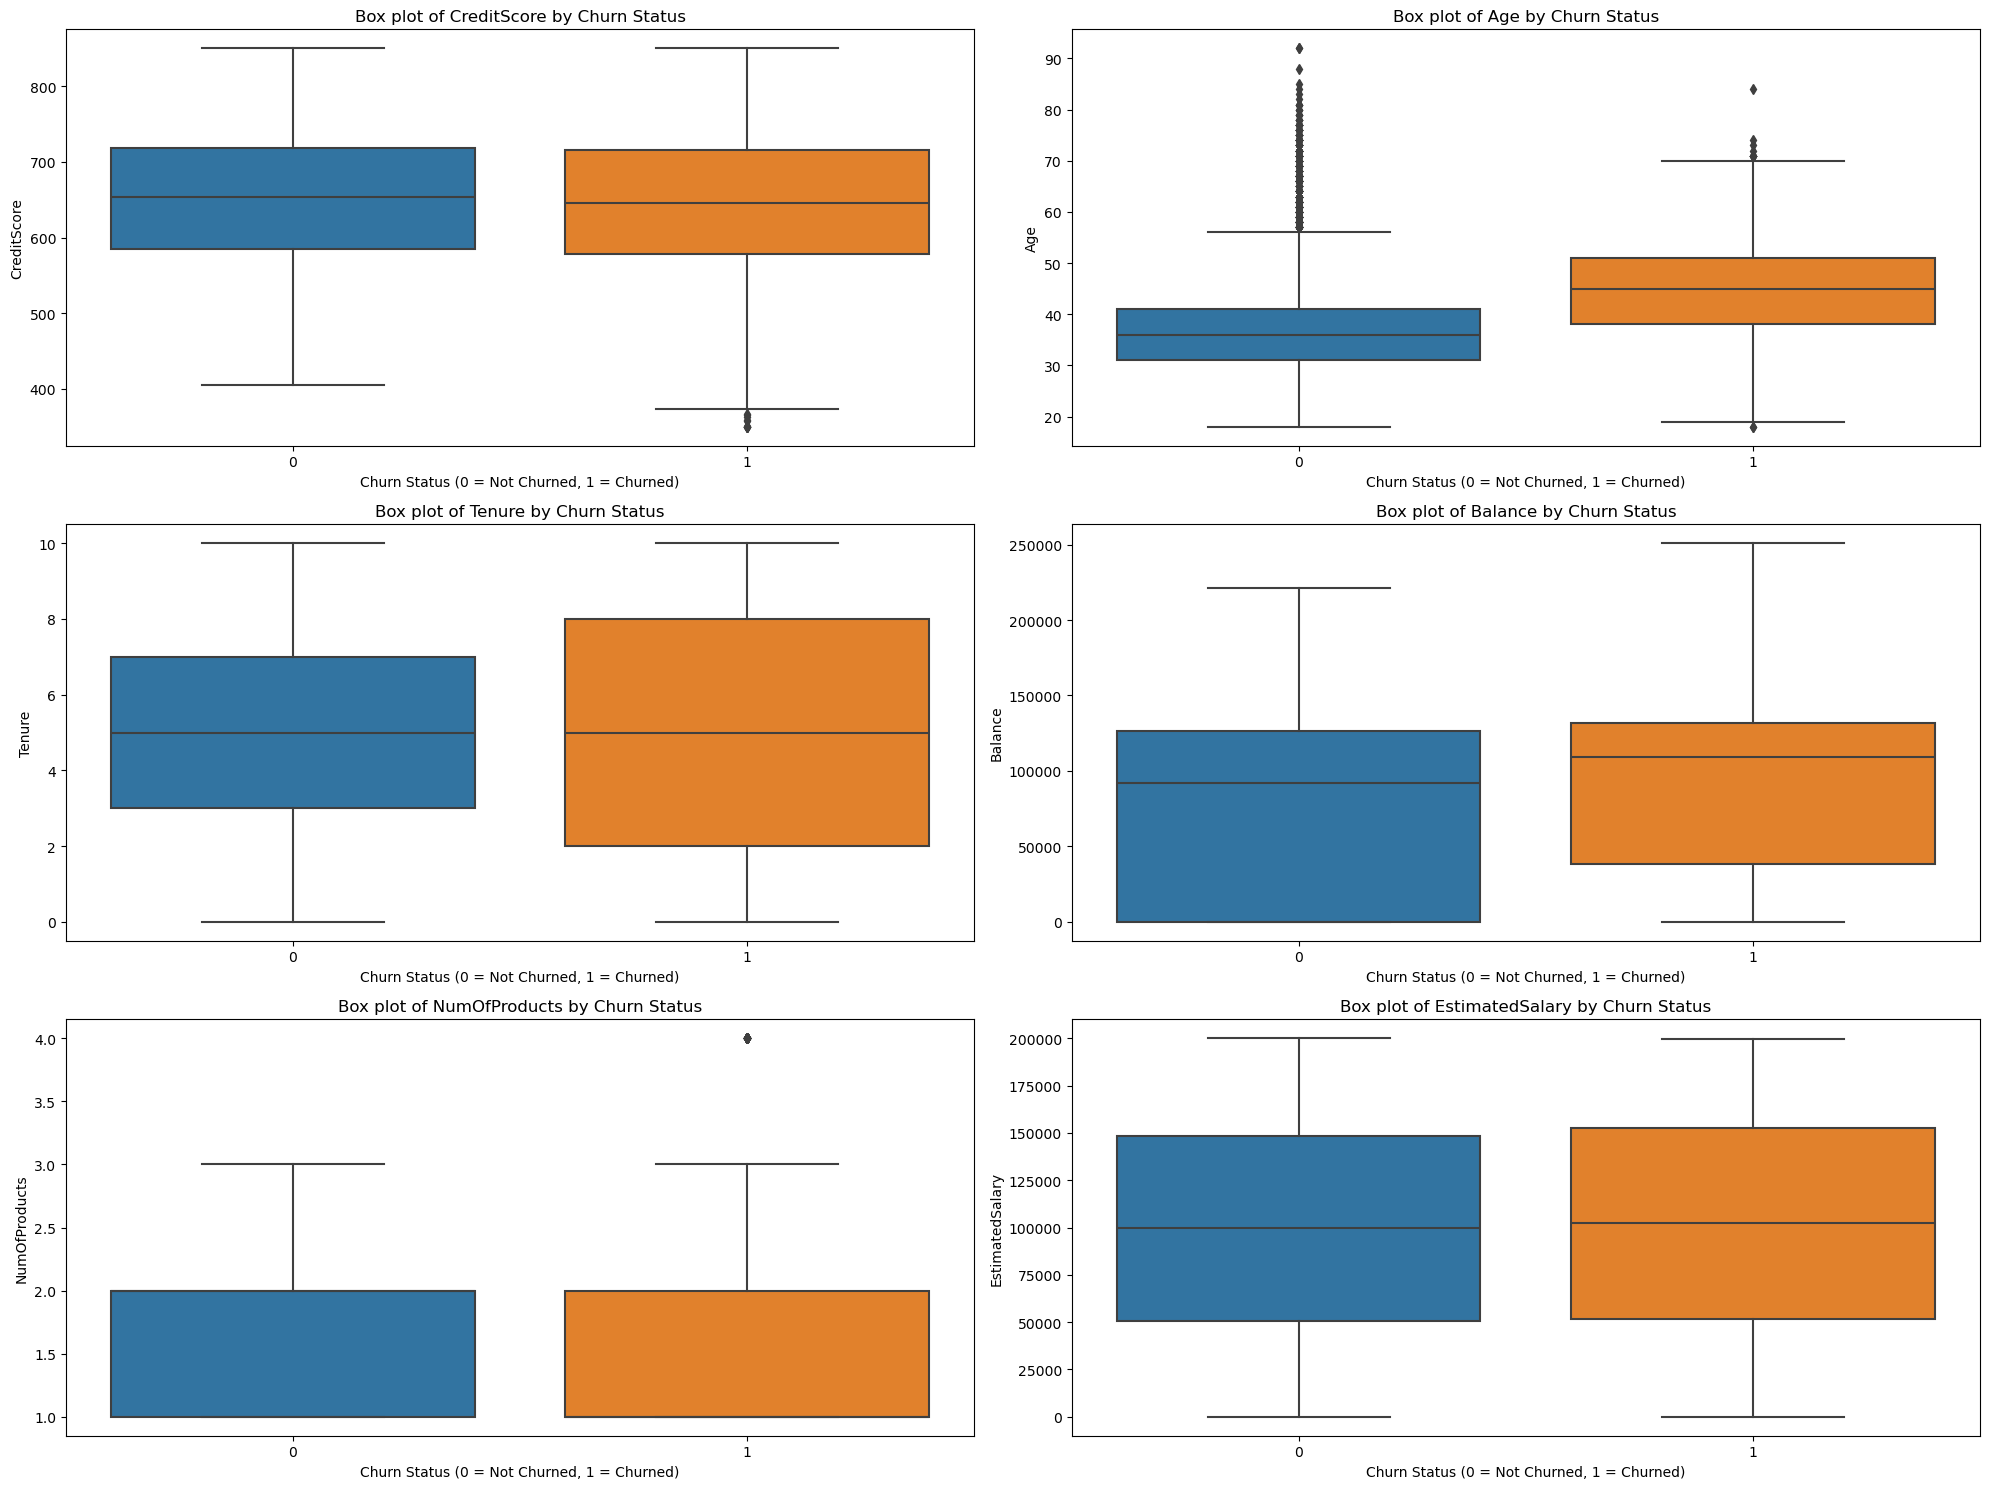

In [13]:
# Plotting numerical variables with respect to churn status
plt.figure(figsize=(20, 15))

for i in range(len(numerical_columns)):
    column = numerical_columns[i]
    plt.subplot(3, 2, i + 1)  # Create a 3x2 grid
    sns.boxplot(x='Exited', y=column, data=churn_df)
    plt.title(f'Box plot of {column} by Churn Status')
    plt.xlabel('Churn Status (0 = Not Churned, 1 = Churned)')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

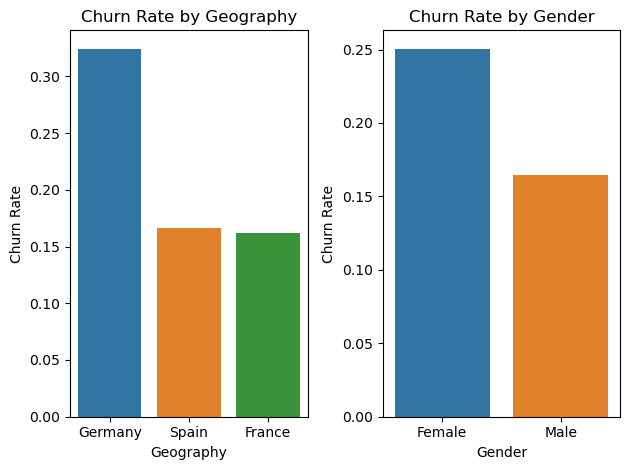

Overall Churn Rate: 20.37%


In [15]:
# Geography vs Churn
plt.subplot(1, 2, 1)
geo_churn = churn_df.groupby('Geography')['Exited'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Geography', y='Exited', data=geo_churn)
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')

# Gender vs Churn
plt.subplot(1, 2, 2)
gender_churn = churn_df.groupby('Gender')['Exited'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Gender', y='Exited', data=gender_churn)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

# Compute the proportion of churned customers
churn_rate = churn_df['Exited'].mean() * 100
print(f'Overall Churn Rate: {churn_rate:.2f}%')

### Comments on the result:

**CreditScore: Visualize if lower or higher credit scores are associated with higher churn rates.**

**Age: Determine if younger or older customers are more likely to churn.**

**Tenure: Check if customers with shorter or longer tenures are more likely to churn.**

**Balance: See if customers with higher or lower balances are more prone to churn.**

**NumOfProducts: Analyze the number of products held by churned versus non-churned customers.**

**EstimatedSalary: Look for any patterns between salary and churn status.**

###  Q3:

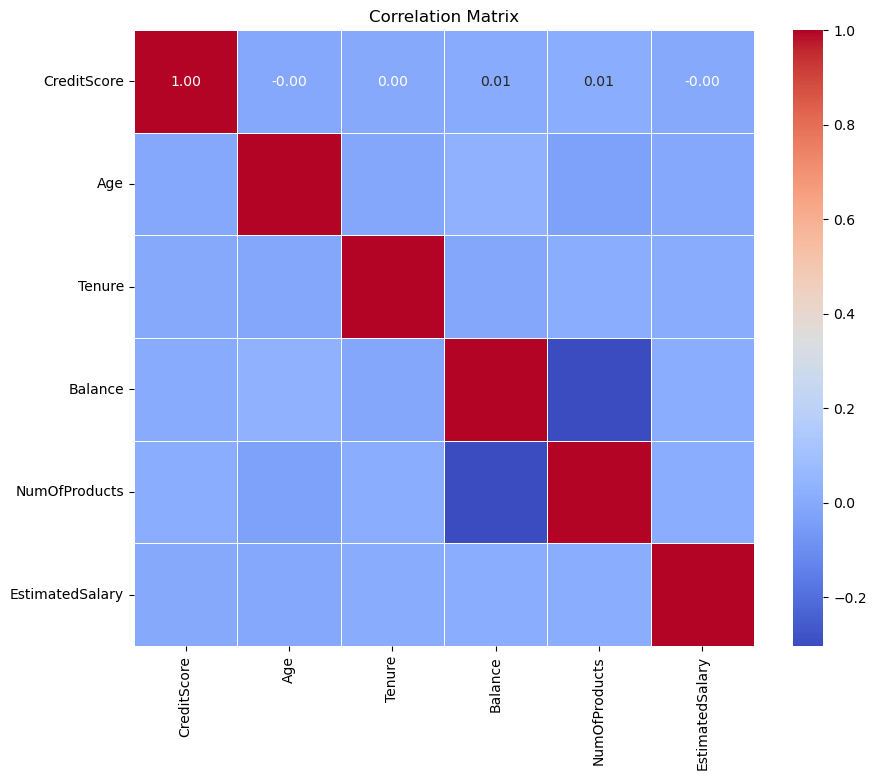

In [18]:
# List of numerical columns including the churn column
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Compute the correlation matrix
correlation_matrix = churn_df[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Comments on the result:

**CreditScore: If the correlation with Exited is negative and significant, lower credit scores might be associated with higher churn rates.**

**Age: A positive correlation with Exited would indicate that older customers tend to churn more.**

**Tenure: A negative correlation with Exited might suggest that customers with longer tenures are less likely to churn.**

**Balance: If there's a positive correlation with Exited, customers with higher balances might be more prone to churn.**

**NumOfProducts: A negative correlation with Exited would mean that customers with more products are less likely to churn.**

**EstimatedSalary: The correlation with Exited will show if there's any significant relationship between salary and churn.**

C:\Users\ezzat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ezzat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ezzat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ezzat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

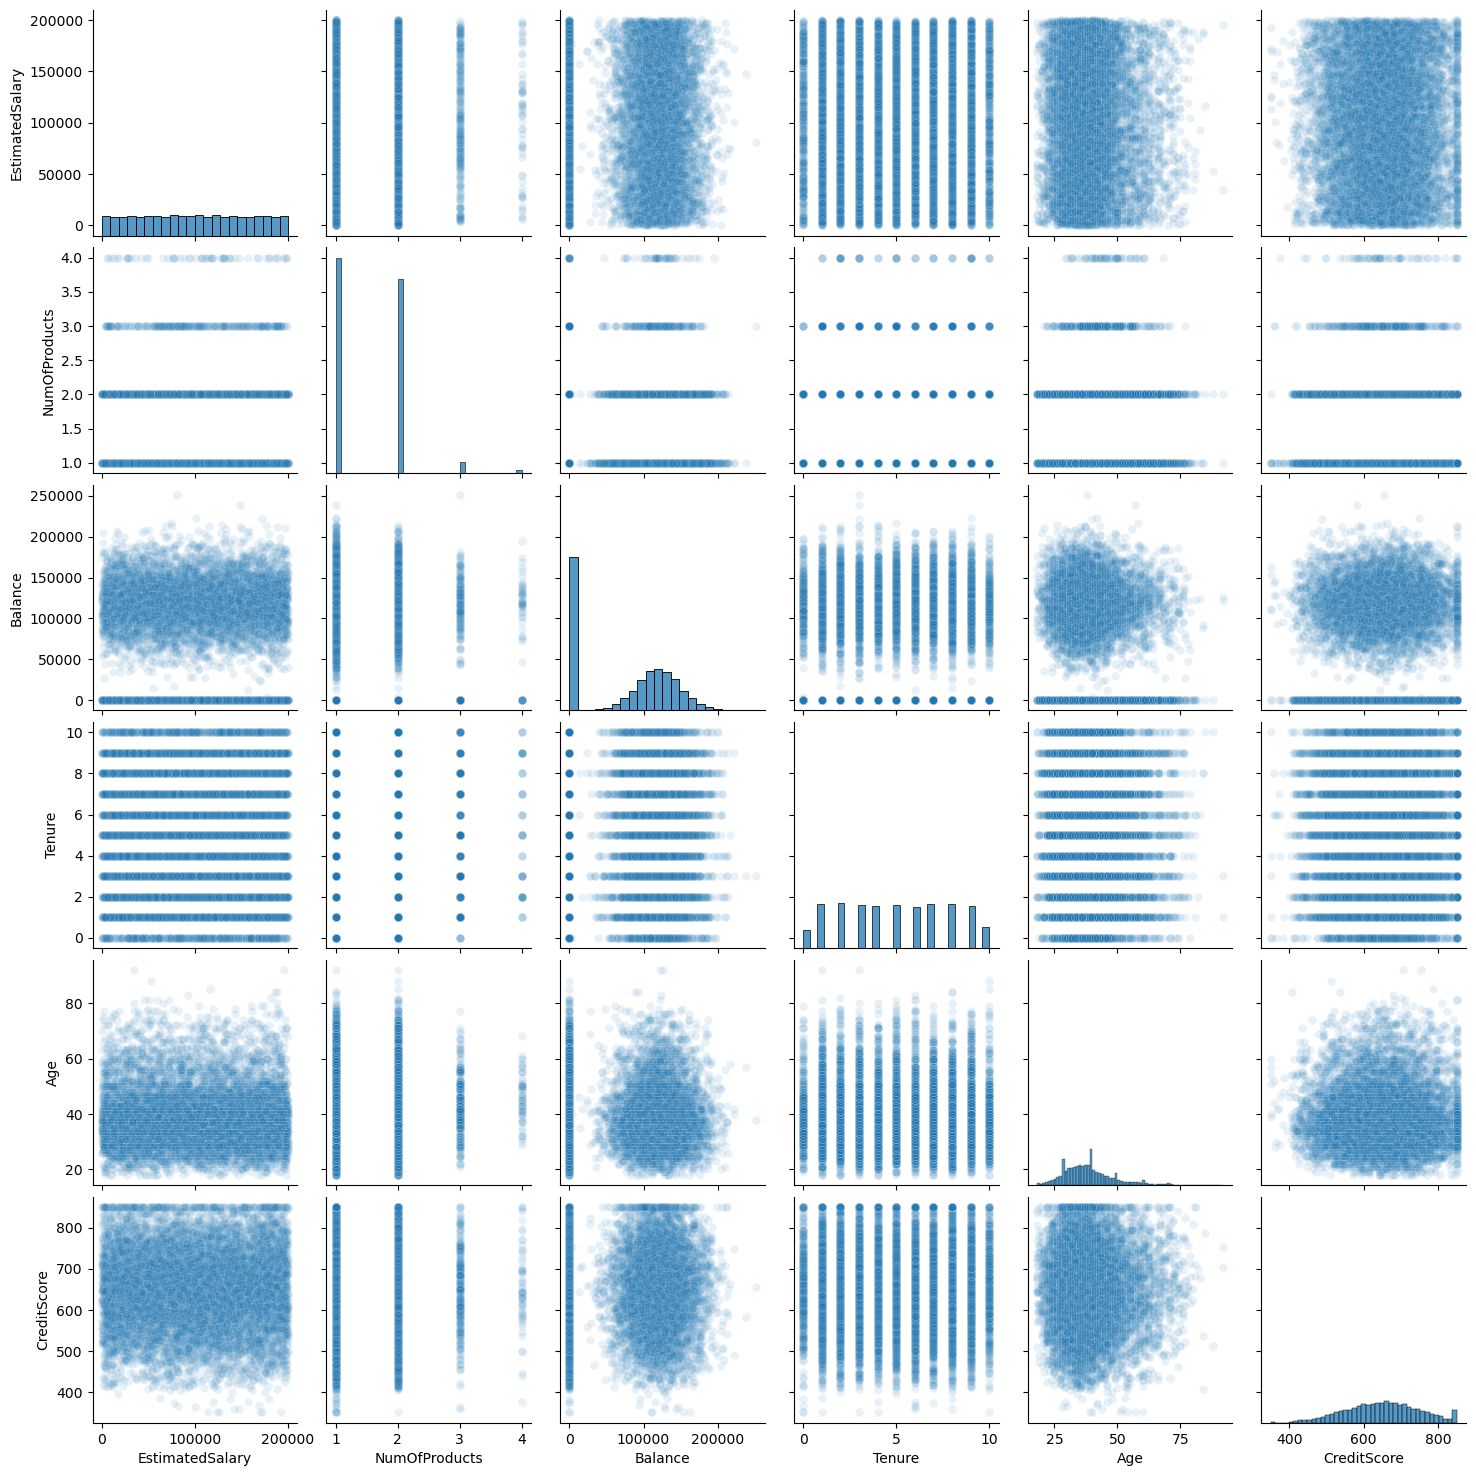

In [21]:
med_variables = churn_df[['EstimatedSalary', 'NumOfProducts', 'Balance', 'Tenure', 'Age', 'CreditScore']]

sns.pairplot(med_variables,plot_kws={'alpha':0.1})
plt.show()


### Comments on the result:

**CreditScore vs Churn: Look for patterns that might show that customers with certain credit scores are more likely to churn.**

**Age vs Churn: Visualize if there are specific age groups that are more likely to churn.**

**Tenure vs Churn: Check if customers with certain tenures are more likely to churn.**

**Balance vs Churn: Observe if there are trends in balance amounts that correlate with higher churn rates.**

**NumOfProducts vs Churn: Identify if customers with a certain number of products are more likely to churn.**

**EstimatedSalary vs Churn: Look for any patterns indicating a relationship between salary and churn.**

###  Q4:
Solution:



In [24]:
# Function to identify outliers using the IQR method
def find_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify outliers for each numerical column
outliers = pd.DataFrame()
for column in numerical_columns:
    outliers = outliers._append(find_outliers_IQR(churn_df, column))

# Remove duplicate outliers
outliers = outliers.drop_duplicates()

# Display the outliers
outliers

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148.0,Obinna,376,Germany,Female,29.0,4,115046.74,4.0,1,0,119346.88,1
942,943,15804586.0,Lin,376,France,Female,46.0,6,0.00,1.0,1,0,157333.69,1
1193,1194,15779947.0,Thomas,363,Spain,Female,28.0,6,146098.43,3.0,1,0,100615.14,1
1405,1406,15612494.0,Panicucci,359,France,Female,44.0,6,128747.69,1.0,1,0,146955.71,1
1631,1632,15685372.0,Azubuike,350,Spain,Male,54.0,1,152677.48,1.0,1,1,191973.49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9323,9324,15815316.0,Kennedy,644,France,Male,50.0,9,76817.00,4.0,1,0,196371.13,1
9370,9371,15732438.0,Cheng,561,France,Male,43.0,4,0.00,4.0,0,0,18522.91,1
9411,9412,15796115.0,Forbes,689,Germany,Female,40.0,4,78119.59,4.0,1,0,119259.34,1
9540,9541,15634551.0,Williamson,727,Germany,Male,46.0,3,115248.11,4.0,1,0,130752.01,1


In [26]:
# Function to remove outliers using the IQR method
def remove_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each numerical column
df_cleaned = churn_df.copy()
for column in numerical_columns:
    df_cleaned = remove_outliers_IQR(df_cleaned, column)

# Display the number of rows before and after removing outliers
print(f"Original data shape: {churn_df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")

# Display the first few rows of the cleaned dataset
df_cleaned.head()

Original data shape: (10000, 14)
Cleaned data shape: (9555, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602.0,Hargrave,619,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1
1,2,15647311.0,Hill,608,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0
2,3,15619304.0,Onio,502,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1
3,4,15701354.0,Boni,699,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0
4,5,15737888.0,Mitchell,850,Spain,Female,43.0,2,125510.82,1.0,1,1,79084.10,0


### Comments on the result:

**The number of rows before and after removing outliers will give an indication of how many data points were considered outliers.**

**The cleaned dataset should now have fewer extreme values, potentially leading to more accurate and reliable analysis.**

###  Q5:

In [34]:
# Check for missing values in the dataset
missing_values = churn_df.isnull().sum()
missing_values

RowNumber          0
CustomerId         7
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [38]:
for column in numerical_columns:
    if churn_df[column].isnull().sum() > 0:
        # Impute with mean
        churn_df[column].fillna(churn_df[column].mean(), inplace=True)

# For categorical columns, we can impute with mode
categorical_columns = ['Geography', 'Gender']
for column in categorical_columns:
    if churn_df[column].isnull().sum() > 0:
        # Impute with mode
        churn_df[column].fillna(churn_df[column].mode()[0], inplace=True)

# Verify if all missing values have been treated
missing_values_after_treatment = churn_df.isnull().sum()
print("\nMissing values in each column after treatment:")
missing_values_after_treatment


Missing values in each column after treatment:


RowNumber          0
CustomerId         7
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Detailed Explanation in the Comments:

 **1. Identify Missing Values: The isnull().sum() function is used to count missing values in each column. This helps us understand the extent of missing data.**
 
#### Decide on Treatment Method:
**1. Remove Rows/Columns: Suitable when the proportion of missing values is very low.**

**2. Impute Values: Appropriate when many values are missing. For numerical columns, we use mean imputation because it is simple and effective. For categorical columns, we use mode imputation to maintain the most frequent category.**

#### Implement Treatment:

**1. Mean Imputation: For each numerical column with missing values, replace the missing values with the column mean.**

**2. Mode Imputation: For each categorical column with missing values, replace the missing values with the column mode (most frequent value).**

**3. Verify Treatment: After handling missing values, we check again to ensure there are no remaining missing values.**

###  Q6:

In [42]:
zero_values = (churn_df[numerical_columns] == 0).sum()
print("Zero values in each numerical column:")
zero_values

Zero values in each numerical column:


CreditScore           0
Age                   0
Tenure              413
Balance            3617
NumOfProducts         0
EstimatedSalary       0
dtype: int64

In [46]:
# Impute zero values for Balance and EstimatedSalary

# Replace zeros in Balance with the median balance
median_balance = churn_df['Balance'].median()
churn_df['Balance'] = churn_df['Balance'].replace(0, median_balance)

# Replace zeros in EstimatedSalary with the median estimated salary
median_salary = churn_df['Tenure'].median()
churn_df['Tenure'] = churn_df['Tenure'].replace(0, median_salary)

# Verify that zero values have been imputed
zero_values_after_imputation = (churn_df[numerical_columns] == 0).sum()
print("\nZero values in each numerical column after imputation:")
zero_values_after_imputation


Zero values in each numerical column after imputation:


CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
EstimatedSalary    0
dtype: int64

### Detailed Explanation in the Comments:

**Identify Zero Values: The (df[numerical_columns] == 0).sum() function counts the number of zero values in each numerical column.**

##### Impute Zero Values:
**Balance: In a banking context, while some customers might have a balance of zero, it is often better to treat these as missing data. The median is used for imputation because it is less sensitive to outliers than the mean.**

**EstimatedSalary: It is highly unlikely for a customer to have a salary of zero. Imputing the median salary helps maintain the central tendency of the data without being affected by outliers.**


###  Q7:

In [51]:
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical columns
churn_df[numerical_columns] = scaler.fit_transform(churn_df[numerical_columns])

# Display the first few rows of the scaled dataset
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602.0,Hargrave,0.538,France,Female,0.324324,0.111111,0.378060,0.000000,1,1,0.506735,1
1,2,15647311.0,Hill,0.516,Spain,Female,0.310811,0.000000,0.323876,0.000000,0,1,0.562709,0
2,3,15619304.0,Onio,0.304,France,Female,0.324324,0.777778,0.630812,0.666667,1,0,0.569654,1
3,4,15701354.0,Boni,0.698,France,Female,0.283784,0.000000,0.378060,0.333333,0,0,0.469120,0
4,5,15737888.0,Mitchell,1.000,Spain,Female,0.337838,0.111111,0.492625,0.000000,1,1,0.395400,0


### Rationale for Min-Max Scaling

**Uniform Scale: Min-Max Scaling ensures that all features contribute equally to the model by bringing them to a common scale.**

**Interpretability: The scaled values lie between 0 and 1, making them easier to interpret.**

**Compatibility with Models: Many machine learning algorithms perform better when the input features are on a similar scale, especially those based on distance metrics or gradient descent.**

###  Q8:

In [54]:
import pandas as pd
import datetime as dt

# index combines balance, product count, and credit score into a single metric reflecting customer value to the bank
churn_df['Customer_Value_Index'] = (0.5 * churn_df['CreditScore'] + 0.3 * churn_df['Balance'] + 0.2 * churn_df['NumOfProducts']) / (0.5 + 0.3 + 0.2)

# interaction features like age and balance highlight how their combination might impact churn, revealing unique customer behaviors.
churn_df['Age_Balance_Interaction'] = churn_df['Age'] * churn_df['Balance']

# salary to balance ratio reflects financial health; lower ratios suggest financial pressure
churn_df['Salary_to_Balance_Ratio'] = churn_df['EstimatedSalary'] / churn_df['Balance']

print(churn_df[['Customer_Value_Index', 'Age_Balance_Interaction', 'Salary_to_Balance_Ratio']].head())

   Customer_Value_Index  Age_Balance_Interaction  Salary_to_Balance_Ratio
0              0.382418                 0.122614                 1.340354
1              0.355163                 0.100664                 1.737423
2              0.474577                 0.204588                 0.903050
3              0.529085                 0.107287                 1.240860
4              0.647788                 0.166427                 0.802640


In [60]:
# Drop irrelevant columns
df = churn_df.drop(columns=['RowNumber', 'Surname'])

# Display the columns to verify
df.columns


Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Customer_Value_Index',
       'Age_Balance_Interaction', 'Salary_to_Balance_Ratio'],
      dtype='object')

### The Logic of adding new attributes:

**To enhance the dataset and improve the predictive power of the model.**

# Assignment Part 2 - Machine Learning Models for Prediction

## Total Points: 15

In Assignment Part 1, we explored and preprocessed the dataset, including cleaning, modifying features, and creating new ones.

In Assignment Part 2, we will apply supervised machine learning models for classification and regression tasks, evaluate their performance, and identify the best models to solve the following problems:

## Classification Problem

Given a training dataset of customers who churned or did not churn, your task is to build a model that predicts, based on a given test dataset without churn event information, whether these customers in the test dataset will churn or not.

## Regression Problem

Your task is to predict the remaining tenure of customers who are still with the company.

These tasks will involve applying various supervised machine learning algorithms, evaluating their performance, and selecting the best models for each problem.


#### Question 1. (Data Preparation) (2 points)

#### For Classification:

List the relevant features which you will use for classification and explain your answer. (A relevant feature is a feature that can have an impact on whether the customer will churn or not.)

#### For Regression:

List the relevant features which you will use for regression and explain your answer. (A relevant feature is a feature that can have an impact on the prediction of the customer's balance.)

#### Data Splitting:

Divide both your datasets into a training set (70%) and a testing set (30%). All models will be trained and tested on the same splits.


###  Data Preparation & Spliting for the Classification Model

In [64]:
from sklearn.model_selection import train_test_split # is used for training and testing
from sklearn.linear_model import LogisticRegression # Model the is used to solve problem
from sklearn.linear_model import LinearRegression # Model the is used to solve problem
from sklearn.ensemble import RandomForestRegressor # Model the is used to solve problem
from sklearn.ensemble import RandomForestClassifier  # Model the is used to solve problem
from sklearn.neighbors import KNeighborsClassifier # Model the is used to solve problem
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error # calculate mean, r2, absolute error
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt



classification_features = [
    'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]

X_classification = df[classification_features]
y_classification = df['Exited']

# Convert categorical variables to dummy variables
X_classification = pd.get_dummies(X_classification, drop_first=True)

# Splitting the data into training and testing sets (70% training, 30% testing)
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.3)

# Output the shapes of the split datasets
print("Classification Training Set Shape:", X_train_classification.shape, y_train_classification.shape)
print("Classification Testing Set Shape:", X_test_classification.shape, y_test_classification.shape)

Classification Training Set Shape: (7000, 11) (7000,)
Classification Testing Set Shape: (3000, 11) (3000,)


###  Data Preparation & Spliting for the Regression Model

In [66]:
# Feature selection for regression
regression_features = [
    'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]
X_regression = df[regression_features]
y_regression = df['Balance']

# Convert categorical variables to dummy variables
X_regression = pd.get_dummies(X_regression, drop_first=True)

# Splitting the data into training and testing sets (70% training, 30% testing)
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.3)

# Output the shapes of the split datasets
print("Regression Training Set Shape:", X_train_regression.shape, y_train_regression.shape)
print("Regression Testing Set Shape:", X_test_regression.shape, y_test_regression.shape)

Regression Training Set Shape: (7000, 10) (7000,)
Regression Testing Set Shape: (3000, 10) (3000,)


**Question 2. (Classification models)**  _(3 points)_
* Train three different classification models of your choice using the training set. Explain the rationale behind selecting each of these three algorithms. You may refer to the following guidlines for model selection: 
    * Diagram from scikit-learn: https://scikit-learn.org/stable/tutorial/machine_learning_map/
    * Models comparison table: https://docs.google.com/spreadsheets/d/16i47Wmjpj8k-mFRk-NnXXU5tmSQz8h37YxluDV8Zy9U/edit#gid=0



In [68]:
# Feature selection for classification
classification_features = [
    'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]
X_classification = df[classification_features]
y_classification = df['Exited']

# Convert categorical variables to dummy variables
X_classification = pd.get_dummies(X_classification, drop_first=True)

# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_classification, y_classification, test_size=0.3)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Evaluate the models
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_random_forest):.2f}")
print(classification_report(y_test, y_pred_random_forest))
print(confusion_matrix(y_test, y_pred_random_forest))

print("\nK-Nearest Neighbors:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

Logistic Regression:
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2403
           1       0.58      0.20      0.30       597

    accuracy                           0.81      3000
   macro avg       0.71      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000

[[2319   84]
 [ 479  118]]

Random Forest:
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2403
           1       0.73      0.46      0.57       597

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000

[[2303  100]
 [ 322  275]]

K-Nearest Neighbors:
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2403
           1       0.58      0.32      0.41       597

    accuracy            

**Question 3. (Evaluation of classification models)**  _(3 points)_
* Evaluate the performance of your three classification models on the testing set using the following metrics: accuracy, area under the curve (AUC), precision, and recall.
* Based on the models evaluation results, what is the best model and why?




Logistic Regression:
Accuracy: 0.82
Precision: 0.58
Recall: 0.20
AUC: 0.77
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2416
           1       0.58      0.20      0.30       584

    accuracy                           0.82      3000
   macro avg       0.71      0.58      0.60      3000
weighted avg       0.78      0.82      0.78      3000

[[2333   83]
 [ 468  116]]


Random Forest:
Accuracy: 0.87
Precision: 0.77
Recall: 0.47
AUC: 0.85
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.86      0.87      0.86      3000

[[2332   84]
 [ 308  276]]


k-Nearest Neighbors:
Accuracy: 0.82
Precision: 0.57
Recall: 0.29
AUC: 0.73
              precision    recall  f1-score   support

           0  

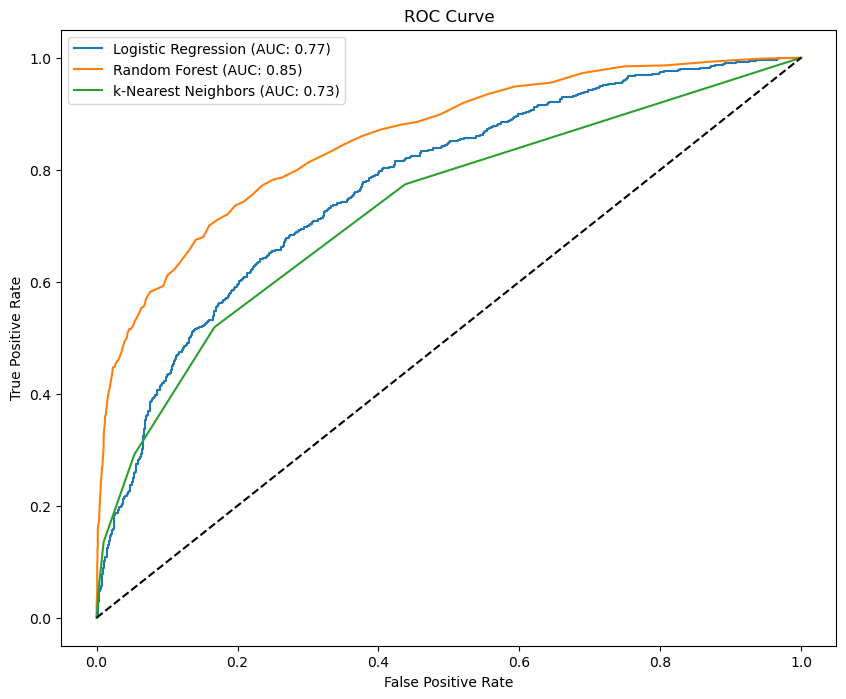

In [72]:
# Feature selection for classification
classification_features = [
    'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]
X_classification = df[classification_features]
y_classification = df['Exited']

# Convert categorical variables to dummy variables
X_classification = pd.get_dummies(X_classification, drop_first=True)

# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_classification, y_classification, test_size=0.3, random_state=42)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_prob_random_forest = random_forest.predict_proba(X_test)[:, 1]
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Evaluate the models
models = {
    'Logistic Regression': (y_pred_log_reg, y_prob_log_reg),
    'Random Forest': (y_pred_random_forest, y_prob_random_forest),
    'k-Nearest Neighbors': (y_pred_knn, y_prob_knn)
}

for model_name, (y_pred, y_prob) in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"AUC: {auc:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Plotting ROC curves
plt.figure(figsize=(10, 8))
for model_name, (y_pred, y_prob) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC: {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**The best model is: (Random Forest) because it's based on evaluation result (accuracy, precision, recall, and AUC)**

**Question 4. (Regression models)**  _(3 points)_
* Train two different regression models of your choice using the training set. Explain the rationale behind selecting each of these two algorithms. 



In [75]:

# Feature selection for regression
regression_features = [
    'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]
X_regression = df[regression_features]
y_regression = df['Balance']

# Convert categorical variables to dummy variables
X_regression = pd.get_dummies(X_regression, drop_first=True)

# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_regression, y_regression, test_size=0.3, random_state=42)

# Initialize the models
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
linear_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

 **These models are selected based on their different strengths and approaches to handling regression problems.**
 
### Rationale Behind Selecting Each Algorithm

#### Linear Regression:

**Rationale: Linear Regression is a simple and widely used model for regression tasks. It assumes a linear relationship between the independent variables and the dependent variable.**

#### Advantages:
**Easy to implement and interpret.**

**Computationally efficient and works well with small to medium-sized datasets.**

**Provides insight into the relationship between variables through coefficients.**

#### Random Forest Regressor:

**Rationale: Random Forest Regressor is an ensemble method that combines multiple decision trees to improve regression performance. It is flexible and can model complex relationships.**

#### Advantages:
**Handles non-linear relationships effectively.**

**Robust to outliers and noise in the data.**

**Provides feature importance scores, which help in understanding the impact of different features.**

**Question 5. (Evaluation of regression models)**  _(3 points)_
* Evaluate the performance of your two regression models on the testing set using the following metrics: mean absolute error,mean squared error, and R-square.
* Based on the models evaluation results, what is the best model and why?



In [45]:
regression_features = [
    'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]
X_regression = df[regression_features]
y_regression = df['Balance']

# Convert categorical variables to dummy variables
X_regression = pd.get_dummies(X_regression, drop_first=True)

# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_regression, y_regression, test_size=0.3, random_state=42)

# Initialize the models
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
linear_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_linear_reg = linear_reg.predict(X_test)
y_pred_random_forest_reg = random_forest_reg.predict(X_test)

# Evaluate the models
models = {
    'Linear Regression': y_pred_linear_reg,
    'Random Forest Regressor': y_pred_random_forest_reg
}

for model_name, y_pred in models.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("\n")

Linear Regression:
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.01
R² Score: 0.05


Random Forest Regressor:
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.01
R² Score: 0.02




**The best model is: (Linear Regression) because it's based on evaluation result (MAE, MSE,R² Score)**

**Question 6. (Possible improvements)** _(1 points)_
* How can you improve the accuracy of your classification model?
* How can you improve the accuracy of your regression model?

### Improving the accuracy of classification model:
#### 1. Feature Engineering
#### 2. Data Preprocessing
#### 3. Model Selection and Hyperparameter Tuning
#### 4. Ensemble Methods
#### 5. Regularization
#### 6. Feature Selection
#### 7. Cross-validation



### Improving the accuracy of Regression model:
#### 1. Feature Engineering
#### 2. Data Preprocessing
#### 3. Model Selection and Hyperparameter Tuning
#### 4. Ensemble Methods
#### 5. Regularization
#### 6. Feature Selection
#### 7. Handle Heteroscedasticity
#### 8. Cross-validation

